In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np

# Đọc dữ liệu
wine_data = pd.read_csv("C:/Users/Admin/Downloads/winequality-red.csv")

# Giữ lại các biến quan trọng
wine_data = wine_data[['fixed acidity', 'volatile acidity', 'density', 'alcohol', 'quality']]

# Tạo biến mới 
wine_data['Alcohol_Density_Ratio'] = wine_data['alcohol'] / wine_data['density']

# Phân loại chất lượng rượu
wine_data['QualityLevel'] = wine_data['quality'].apply(
    lambda x: 'High Quality' if x >= 7 else ('Low Quality' if x <= 5 else 'Medium')
)

# Lọc 2 nhóm chính để so sánh
wine_compare = wine_data[wine_data['QualityLevel'].isin(['High Quality', 'Low Quality'])]

# Kiểm tra dữ liệu
wine_compare.head()


,fixed acidity,volatile acidity,density,alcohol,quality,Alcohol_Density_Ratio,QualityLevel
0,7.4,0.70,0.9978,9.4,5,9.420726,Low Quality
1,7.8,0.88,0.9968,9.8,5,9.831461,Low Quality
2,7.8,0.76,0.9970,9.8,5,9.829488,Low Quality
4,7.4,0.70,0.9978,9.4,5,9.420726,Low Quality
5,7.4,0.66,0.9978,9.4,5,9.420726,Low Quality


# 2️⃣ Trực quan hóa với Matplotlib
## Case 1 – Biểu đồ cơ bản

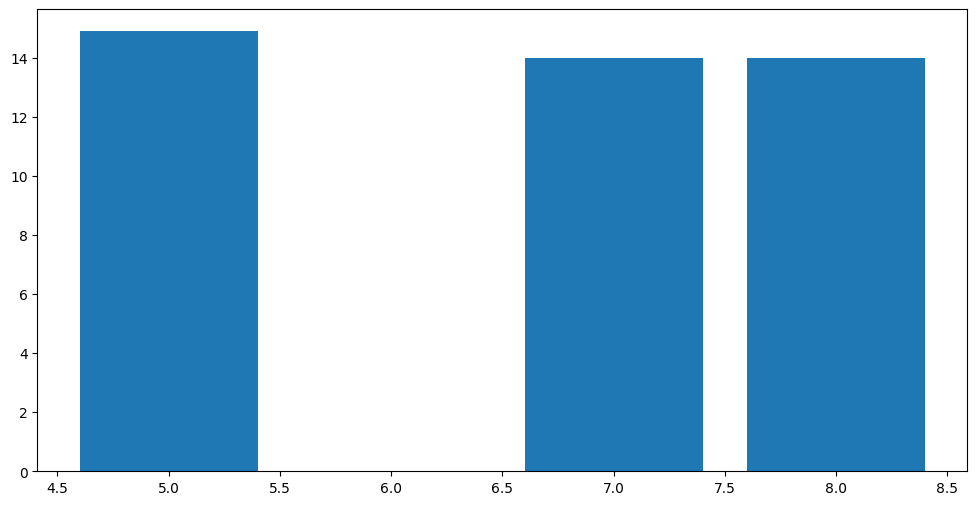

In [2]:
import matplotlib.pyplot as plt

wine_sorted = wine_compare.sort_values('alcohol', ascending=False)
plt.figure(figsize=(12,6))
x = wine_sorted['quality'][:10]
y = wine_sorted['alcohol'][:10]
plt.bar(x, y)
plt.show()


# Case 2 – Biểu đồ nâng cao

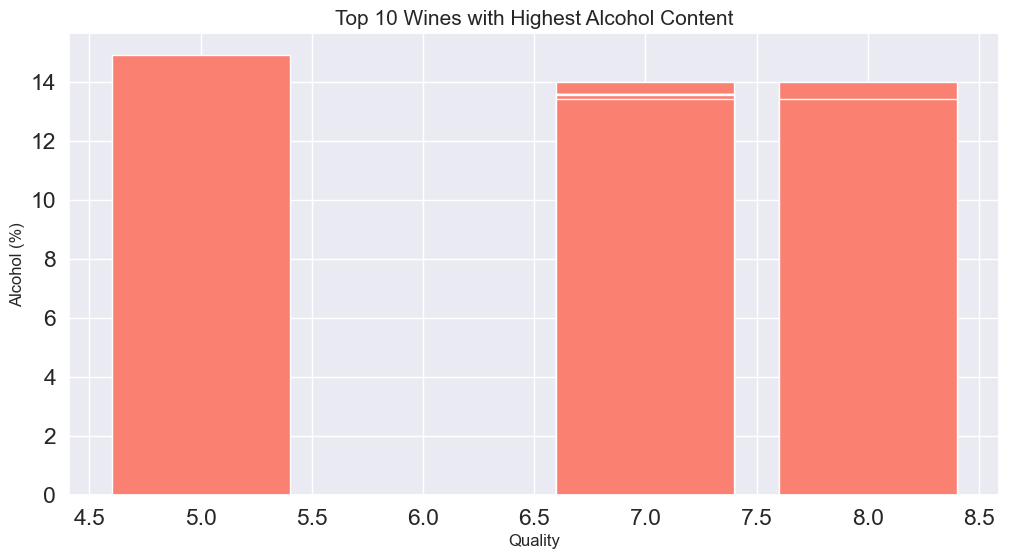

In [18]:
plt.figure(figsize=(12,6))
plt.bar(x, y, color='salmon')
plt.title('Top 10 Wines with Highest Alcohol Content', fontsize=15)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Alcohol (%)', fontsize=12)
plt.show()


# Case 3 – So sánh hai đại lượng (advanced 2)

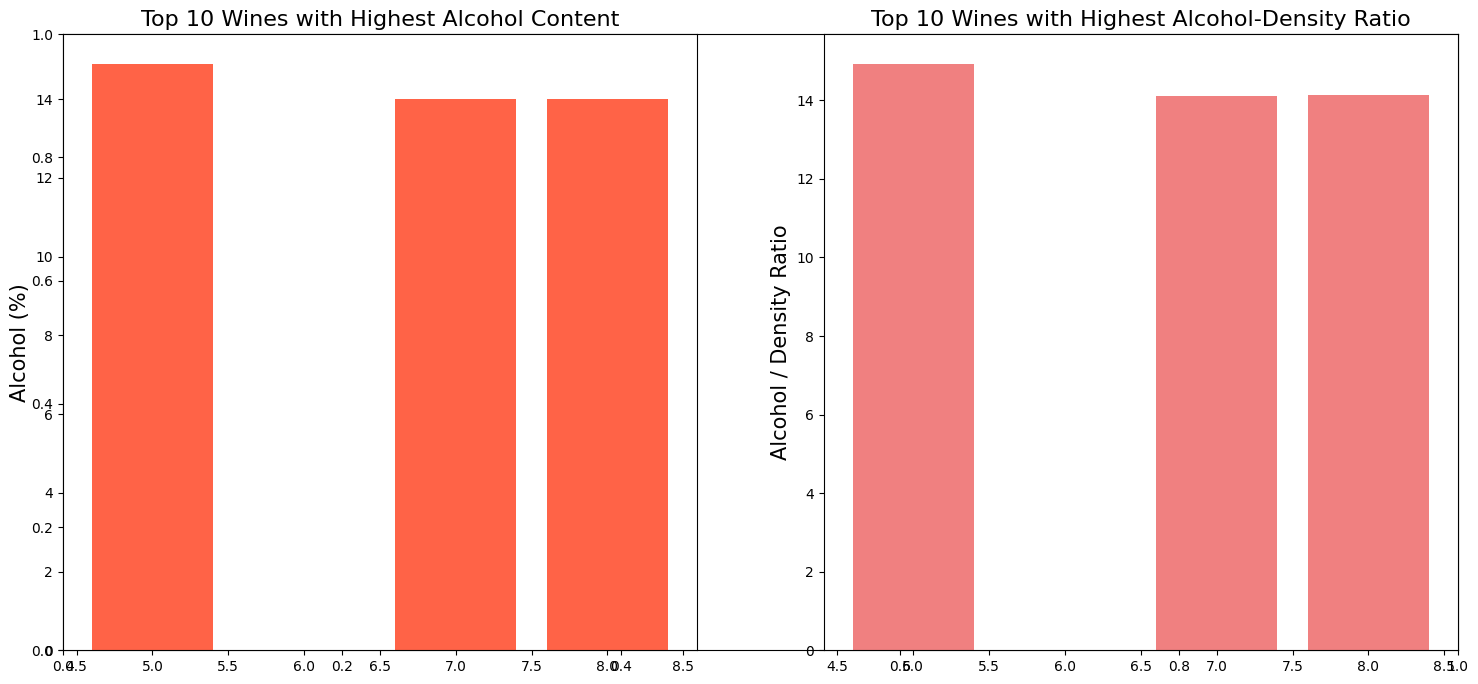

In [4]:
fig, ax = plt.subplots(figsize=(18,8))
x = wine_sorted['quality'][:10]
y = wine_sorted['alcohol'][:10]
y1 = wine_sorted['Alcohol_Density_Ratio'][:10]

plt.subplot(1,2,1)
plt.bar(x, y, color='tomato')
plt.ylabel('Alcohol (%)', fontsize=15)
plt.title('Top 10 Wines with Highest Alcohol Content', fontsize=16)

plt.subplot(1,2,2)
plt.bar(x, y1, color='lightcoral')
plt.ylabel('Alcohol / Density Ratio', fontsize=15)
plt.title('Top 10 Wines with Highest Alcohol-Density Ratio', fontsize=16)

plt.show()


# 3️⃣ Trực quan hóa với Seaborn

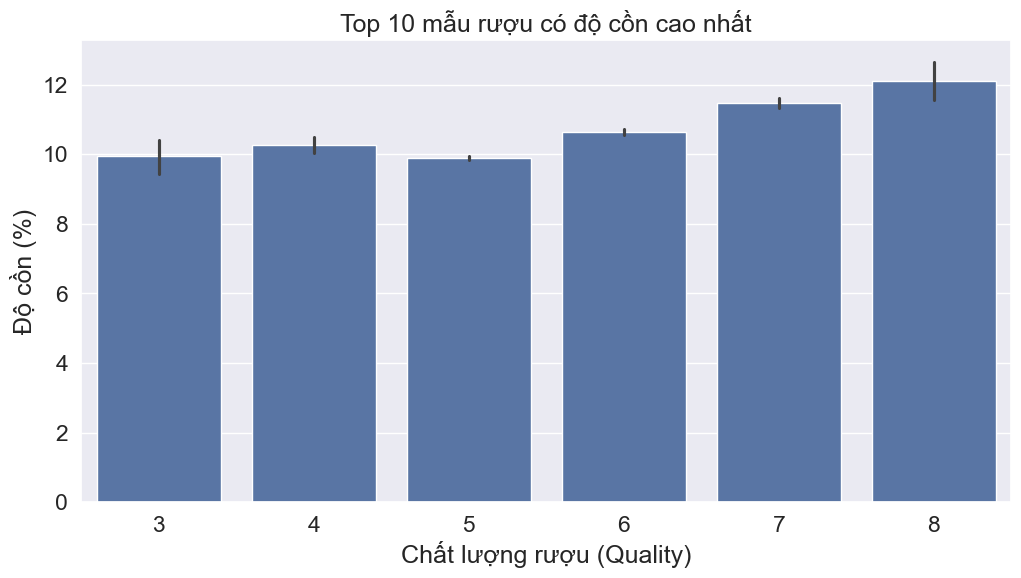

In [20]:
plt.figure(figsize=(12,6))
data = wine_sorted
sns.barplot(data=data, x='quality', y='alcohol')
plt.title('Top 10 mẫu rượu có độ cồn cao nhất')
plt.xlabel('Chất lượng rượu (Quality)')
plt.ylabel('Độ cồn (%)')
plt.show()

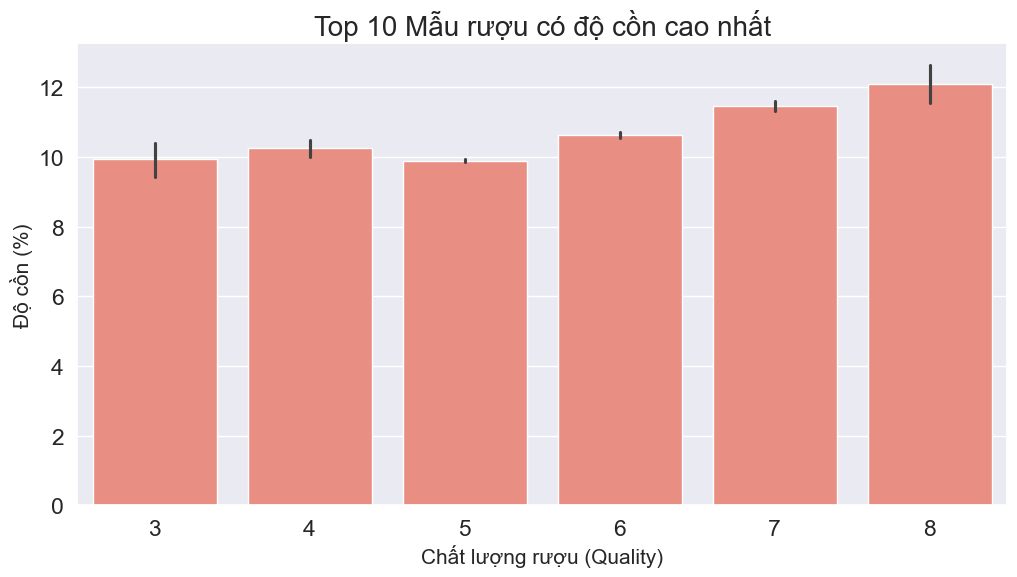

In [22]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=data, x='quality', y='alcohol', color='salmon')

ax.set_xlabel('Chất lượng rượu (Quality)', fontsize=15)
ax.set_ylabel('Độ cồn (%)', fontsize=15)
ax.set_title('Top 10 Mẫu rượu có độ cồn cao nhất', fontsize=20)

plt.show()


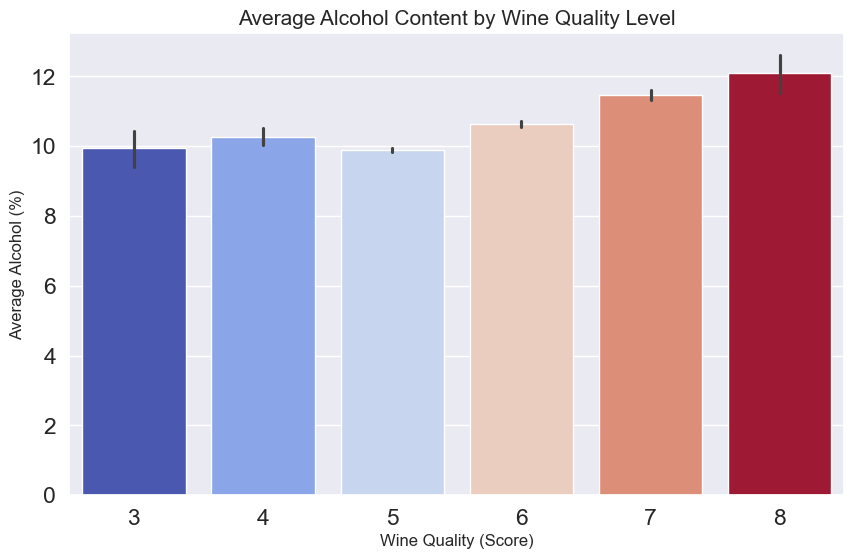

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ cột trung bình Alcohol theo Quality (sử dụng toàn bộ dữ liệu)
plt.figure(figsize=(10,6))
sns.barplot(
    data=wine_data,         
    x='quality',
    y='alcohol',
    hue='quality',          
    palette='coolwarm',
    legend=False
)
plt.title('Average Alcohol Content by Wine Quality Level', fontsize=15)
plt.xlabel('Wine Quality (Score)', fontsize=12)
plt.ylabel('Average Alcohol (%)', fontsize=12)
plt.show()


# 4️⃣ Trực quan hóa với Plotly (tương tác)

In [7]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

# Biểu đồ 1 – trung bình độ cồn theo nhóm chất lượng
fig1 = px.bar(
    wine_compare.groupby('QualityLevel')['alcohol'].mean().reset_index(),
    x='QualityLevel', y='alcohol', color='QualityLevel',
    title='Average Alcohol Content by Quality Level',
    labels={'alcohol': 'Mean Alcohol (%)'}
)
fig1.show()

# Biểu đồ 2 – mối quan hệ giữa độ cồn và độ axit
fig2 = px.scatter(
    wine_compare, x='volatile acidity', y='alcohol',
    color='QualityLevel', size='Alcohol_Density_Ratio',
    title='Alcohol vs Volatile Acidity by Quality Level',
    labels={'volatile acidity': 'Volatile Acidity', 'alcohol': 'Alcohol (%)'}
)
fig2.show()


# Biểu đồ Histogram – Phân bố biến liên tục

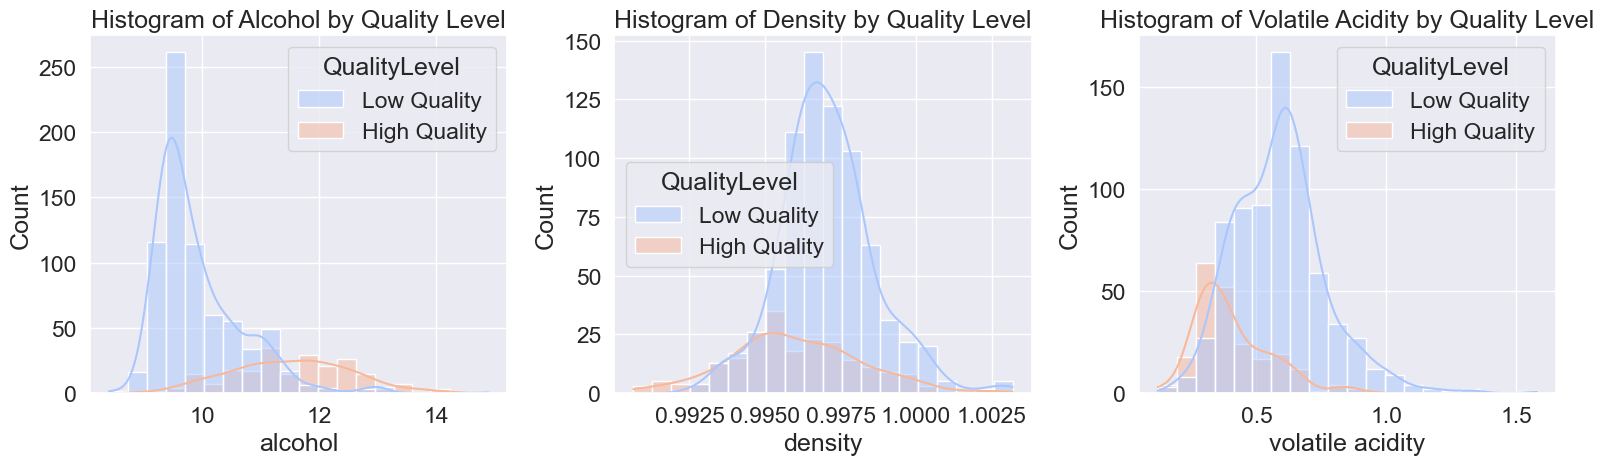

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(data=wine_compare, x='alcohol', hue='QualityLevel', kde=True, bins=20, palette='coolwarm')
plt.title('Histogram of Alcohol by Quality Level')

plt.subplot(1,3,2)
sns.histplot(data=wine_compare, x='density', hue='QualityLevel', kde=True, bins=20, palette='coolwarm')
plt.title('Histogram of Density by Quality Level')

plt.subplot(1,3,3)
sns.histplot(data=wine_compare, x='volatile acidity', hue='QualityLevel', kde=True, bins=20, palette='coolwarm')
plt.title('Histogram of Volatile Acidity by Quality Level')

plt.tight_layout()
plt.show()


# Biểu đồ Scatter Plot – Quan hệ giữa hai biến

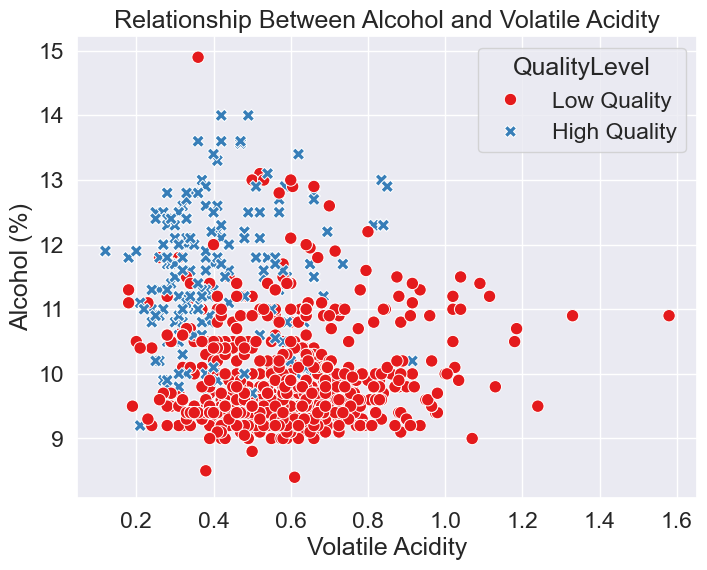

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=wine_compare, x='volatile acidity', y='alcohol',
                hue='QualityLevel', style='QualityLevel', palette='Set1', s=80)
plt.title('Relationship Between Alcohol and Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol (%)')
plt.show()


# 4️⃣ Biểu đồ Boxplot – So sánh phân bố giữa các nhóm

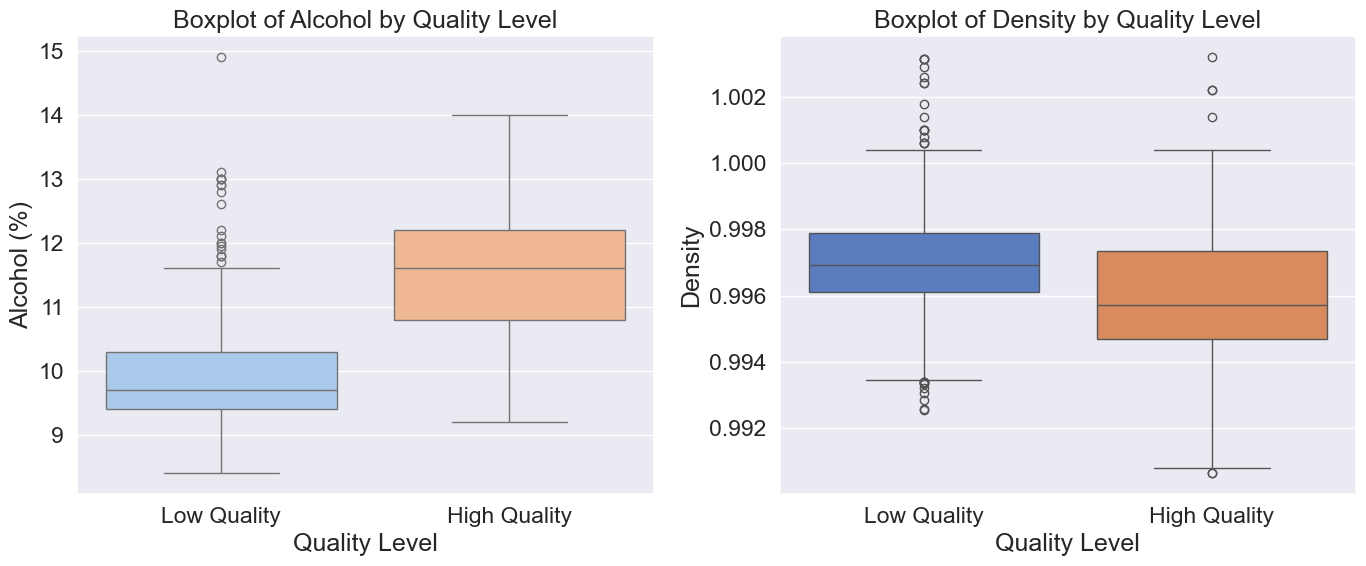

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo Figure
plt.figure(figsize=(14,6))

# Biểu đồ 1 – Alcohol theo nhóm chất lượng
plt.subplot(1,2,1)
sns.boxplot(
    data=wine_compare,
    x='QualityLevel',
    y='alcohol',
    hue='QualityLevel',      
    palette='pastel',
    legend=False
)
plt.title('Boxplot of Alcohol by Quality Level')
plt.xlabel('Quality Level')
plt.ylabel('Alcohol (%)')

# Biểu đồ 2 – Density theo nhóm chất lượng
plt.subplot(1,2,2)
sns.boxplot(
    data=wine_compare,
    x='QualityLevel',
    y='density',
    hue='QualityLevel',
    palette='muted',
    legend=False
)
plt.title('Boxplot of Density by Quality Level')
plt.xlabel('Quality Level')
plt.ylabel('Density')

# Tinh chỉnh bố cục
plt.tight_layout()
plt.show()


# 5️⃣ Biểu đồ Bar Chart – So sánh trung bình giữa nhóm

<Figure size 1000x600 with 0 Axes>

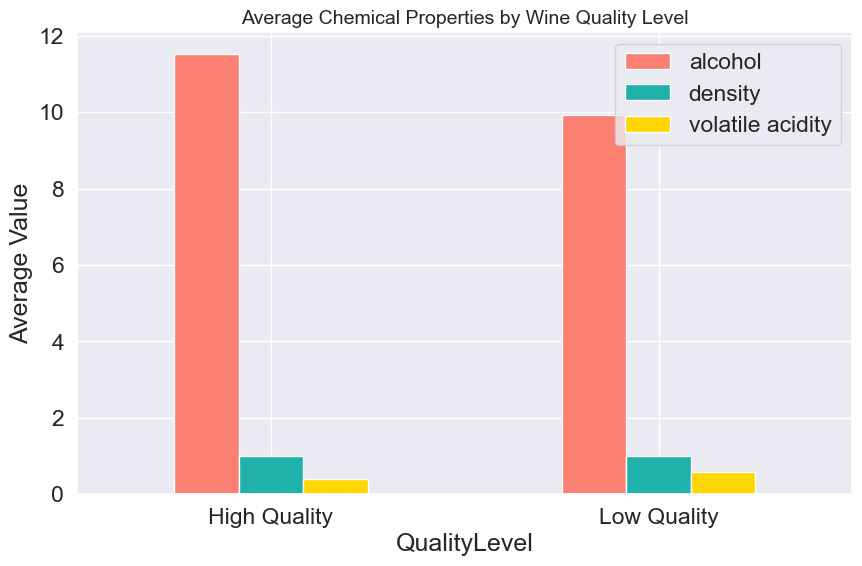

In [11]:
avg_quality = wine_compare.groupby('QualityLevel')[['alcohol','density','volatile acidity']].mean().reset_index()

plt.figure(figsize=(10,6))
avg_quality.plot(x='QualityLevel', kind='bar', figsize=(10,6), color=['salmon','lightseagreen','gold'])
plt.title('Average Chemical Properties by Wine Quality Level', fontsize=14)
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()
